<a href="https://colab.research.google.com/github/NadhirOuerghi/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<h1 align="center">Customer Segmentation</h1> 
<h4 align='center'>using K-means clustering</h4>
<div style="text-align: right">Created<br>
-- By Ouerghi Nadhir<br>
</div>

---

### 1. Importing the libraries and the data

In [ ]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn')

---

In [ ]:
pip install pandas numpy matplotlib seaborn sklearn

### 2. Importing the data from .csv file

First we read the data from the dataset using `read_csv` from the pandas library. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Cust.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Viewing the data that we imported to pandas dataframe object

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---

### 3. Viewing and Describing the data

Now we view the Head and Tail of the data using `head()` and `tail()` respectively.

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Checking the sample size of data - how many samples are there in the dataset using `len()`.

In [ ]:
len(data)

200

Checking the dimensions/shape of the dataset using `shape`.

In [ ]:
data.shape

(200, 5)

Viewing Column names of the dataset using `columns`

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Gender
Column number 3 is Age
Column number 4 is Annual Income (k$)
Column number 5 is Spending Score (1-100)


So, our dataset has 5 columns named:
* CustomerID
* Gender
* Age
* Annual Income (k\$)
* Spending Score (1-100).

View datatypes of each column in the dataset using `dtype`.

In [ ]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Gathering Further information about the dataset using `info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Describing the data as basic statistics using `describe()`

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 4. Checking the data for inconsistencies and further cleaning the data if needed.

Checking data for missing values using `isnull()`.

In [ ]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


Checking summary of missing values

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The 'customer_id' column has no relevence therefore deleting it would be better.

Deleting 'customer_id' colummn using `drop()`.

In [ ]:
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


The 'Annual income' and 'Spending score' columns have spaces in their column names, we need to rename them.

Cleaning the data labels (Annual income and Spending Score) using `rename()`.

In [ ]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


NOTE : Data doesnt have any missing values so it is clean, and therefore no need for cleaning the data

### 5. Understanding and Visualizing Data

Finding and viewing Corelations in the data and columns using `corr()`.

In [ ]:
corr = data.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


Plotting the heatmap of correlation of all the columns of the dataset.

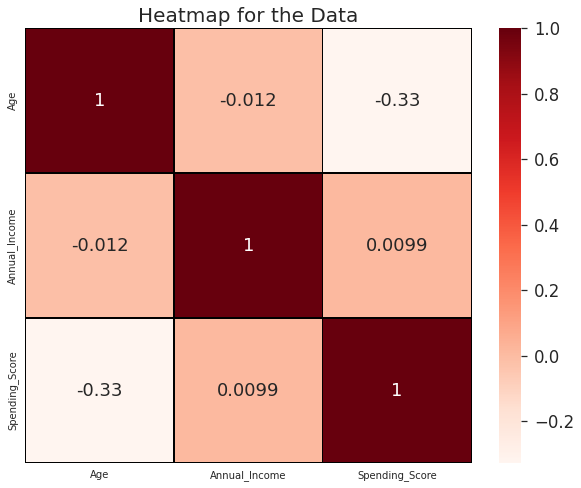

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

#### 5.1. Gender Data Visualization

First we take a look at the gender column of the dataset.

In [ ]:
data['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

Now we take a look at the data type of the column.

In [ ]:
data['Gender'].dtype

dtype('O')

Finding the unique values in the column using `unique()`.

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Counts of each type in the Gender Column using `value_counts()`.

In [ ]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.

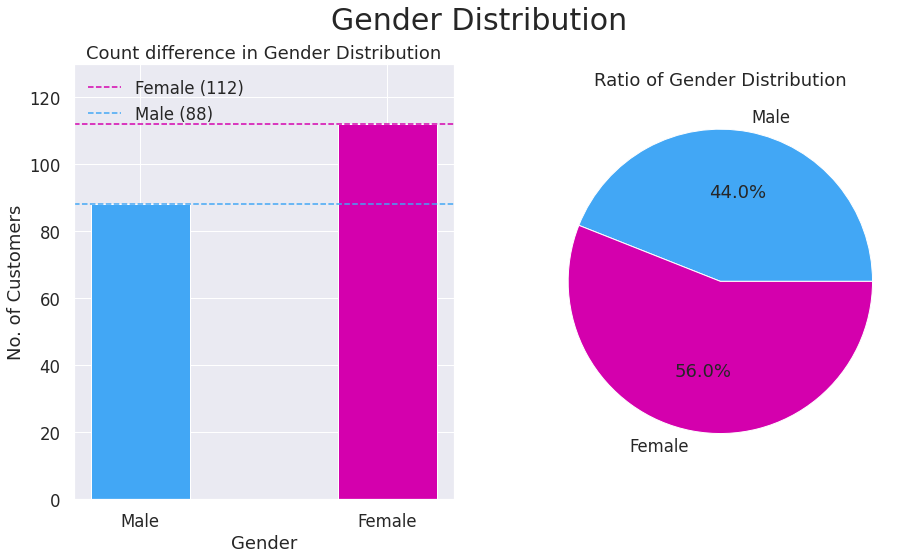

In [ ]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### 5.2. Age Data Visualization

First we take a look at the age column of the dataset.

In [ ]:
data['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

Now the Data type of the column.

In [ ]:
data['Age'].dtype

dtype('int64')

Finding the unique values in the column.

In [ ]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

Statistical Description of the Age column.

In [ ]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Visualizing Statistical Description of the Age on a boxplot.

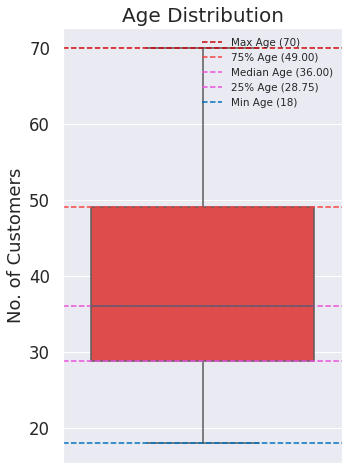

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Counts of first five max age in the Age Column.

In [ ]:
data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

Visualizing Age Distribution using a countplot.

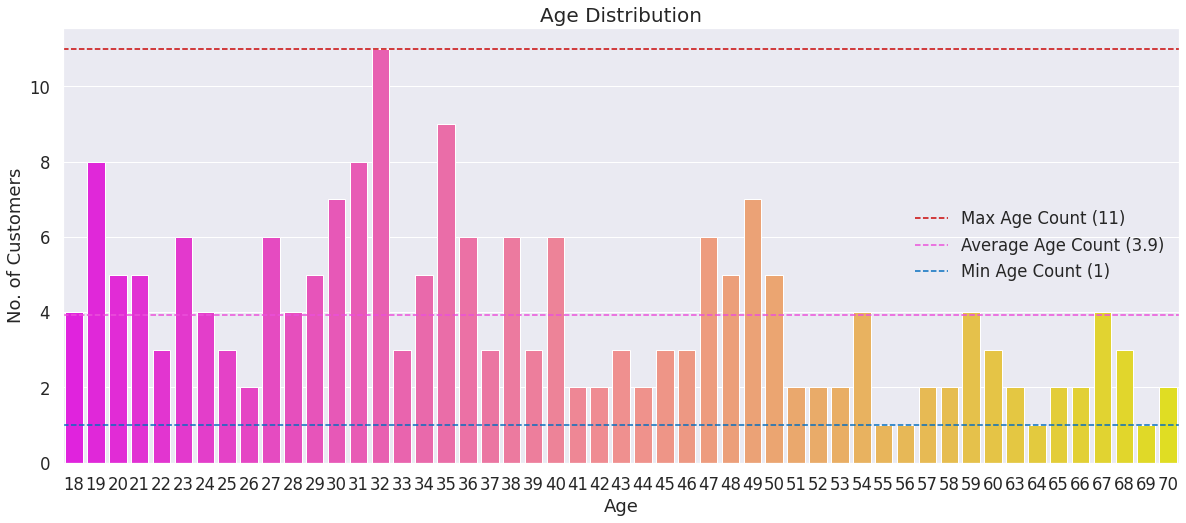

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

###### Gender wise Age Distribution

Statistical Age Distribution of Male customers.

In [ ]:
data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

Statistical Age Distribution of female customers.

In [ ]:
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.

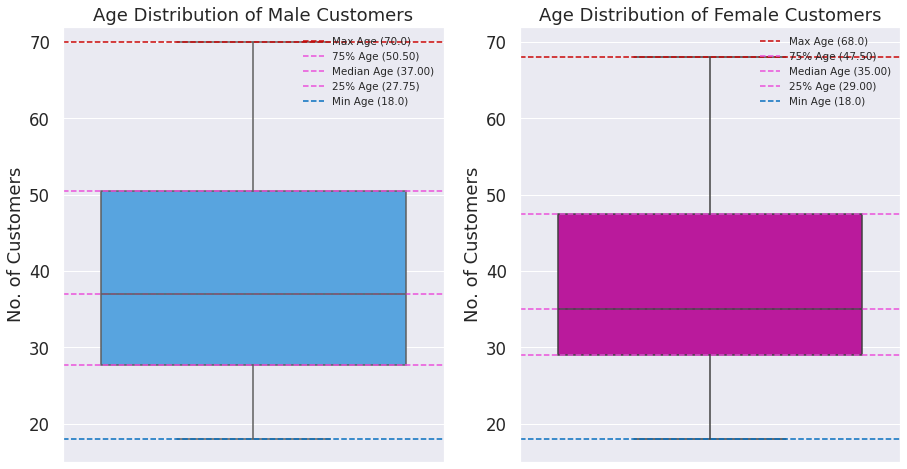

In [ ]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

Average Age of Male Customers.

In [ ]:
data[data['Gender']=='Male'].Age.mean()

39.80681818181818

Counts of first five max age counts in the Male Customers.

In [ ]:
data[data['Gender']=='Male'].Age.value_counts().head()

19    6
32    5
48    5
59    4
28    3
Name: Age, dtype: int64

Visualizing distribution of age count in Male customers using a countplot.

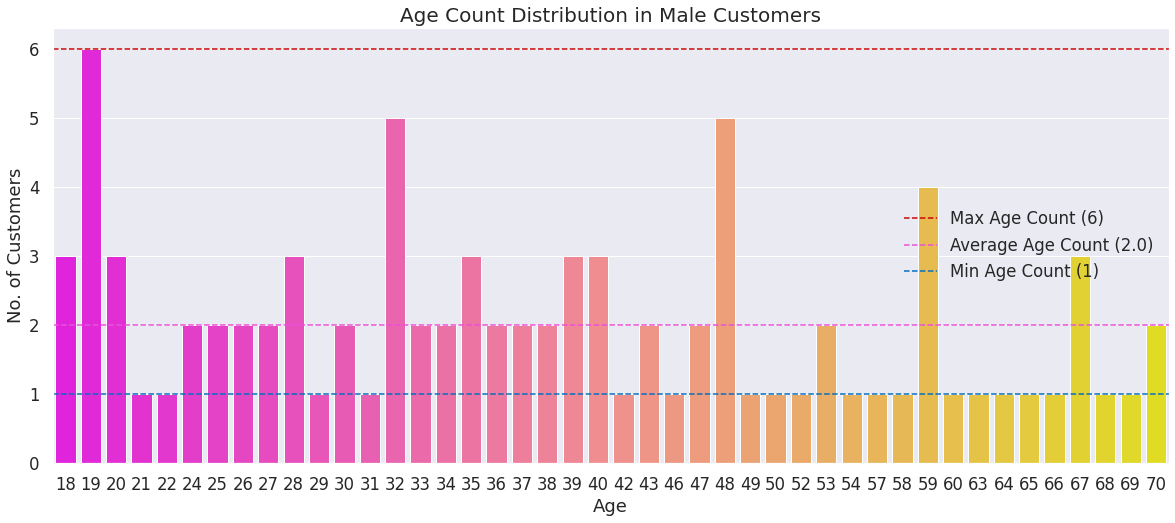

In [ ]:
maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

Average Age of Female Customers.

In [ ]:
data[data['Gender']=='Female'].Age.mean()

38.098214285714285

Counts of first five max age count in the Female Customers.

In [ ]:
data[data['Gender']=='Female'].Age.value_counts().head()

31    7
23    6
49    6
32    6
35    6
Name: Age, dtype: int64

Visualizing distribution of age count in Female customers using a countplot.

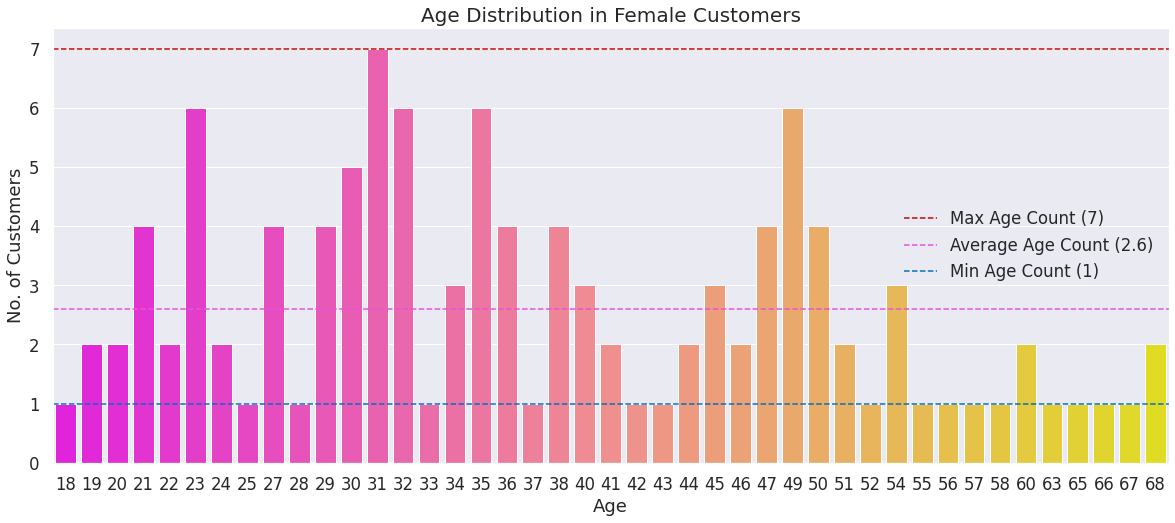

In [ ]:
maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

### 6. Analyzing Data  for Modelling

#### 6.1. Analyzing Annual Income data

First we look at the 'Annual Income' column.

In [ ]:
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

Data type of Annual Income Column.

In [ ]:
data['Annual_Income'].dtype

dtype('int64')

Statistical data about Annual Income column.

In [ ]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Visualizing statistical data about Annual Income column on a boxplot.

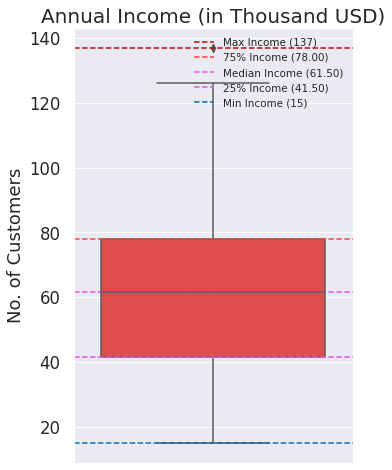

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

Distribution of Annual Income counts.

In [ ]:
data['Annual_Income'].value_counts().head()

54    12
78    12
48     6
71     6
63     6
Name: Annual_Income, dtype: int64

Visualizing Annual Income count value distribution on a histogram.

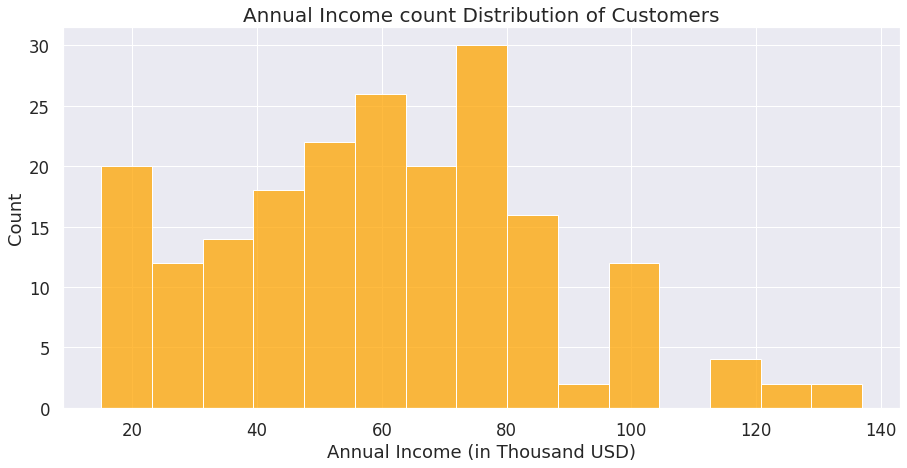

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

Visualizing Annual Income per Age on a Scatterplot.

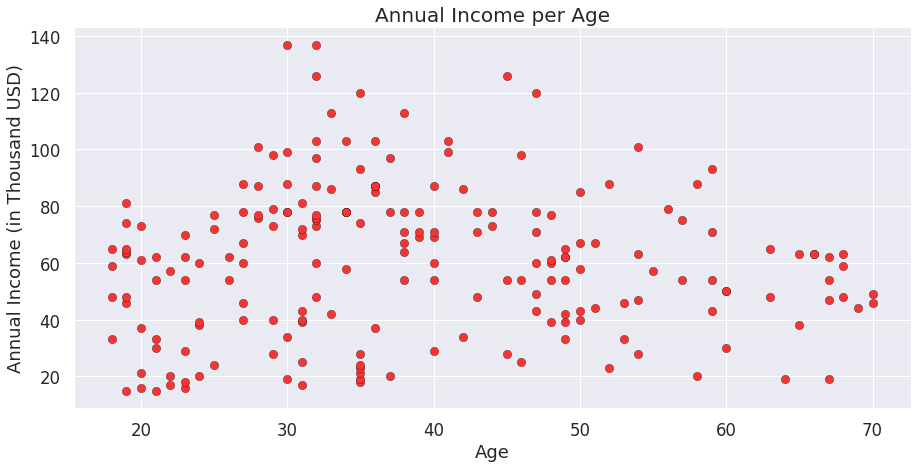

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

###### Annual Income per Gender.

Statistical data about the Annual Income of male customer.

In [ ]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Statistical data about the Annual Income of female customer.

In [ ]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

Visualizing statistical difference of Annual Income between Male and Female Customers.

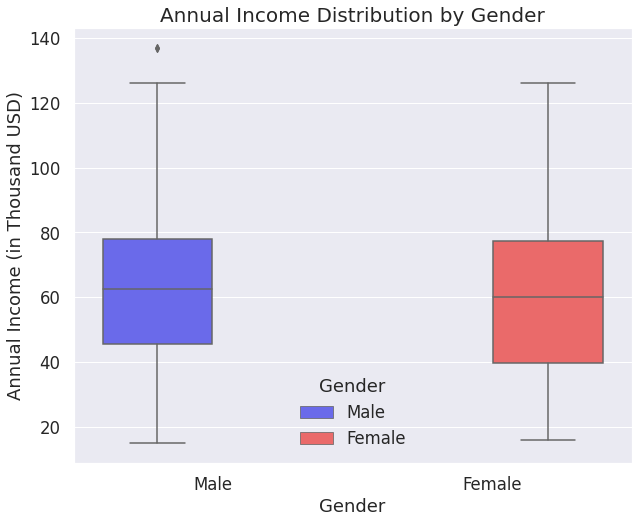

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

Visualizing annual Income per Age by Gender on a scatterplot.

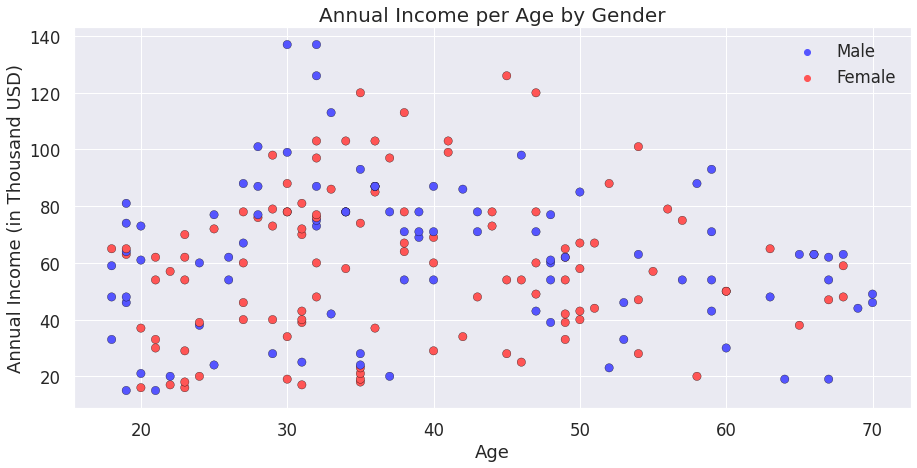

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

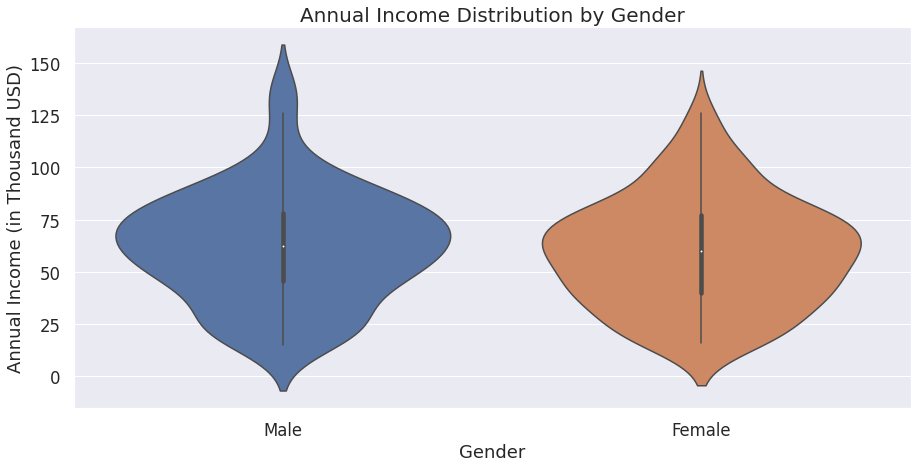

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

#### 6.2. Analyzing Spending Score data

First we look at the Spending Score column.

In [ ]:
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

Data type of Spending score column.

In [ ]:
data['Spending_Score'].dtype

dtype('int64')

Statistical Data of Spending Scores Column.

In [ ]:
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

Visualizing statistical data about Spending score column on a boxplot.

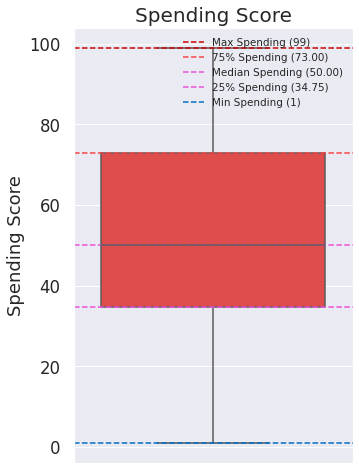

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 20)
plt.show()

Visualizing Spending Scores per Age on a scatterplot.

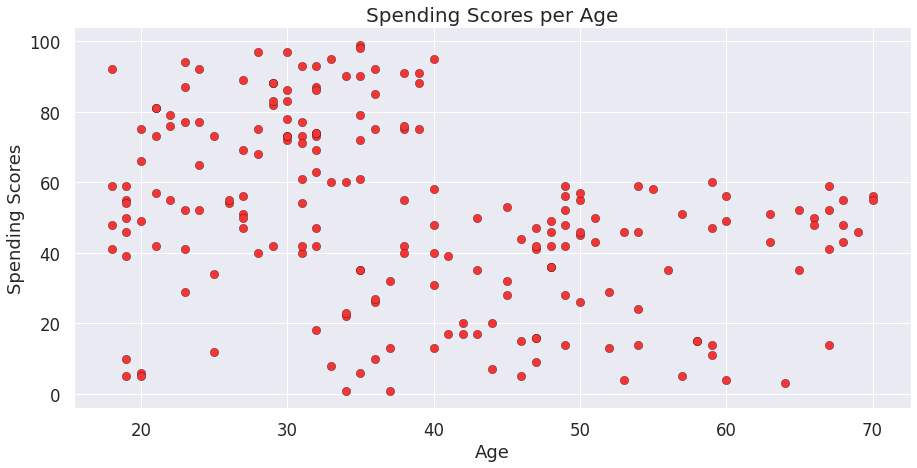

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

###### Spending Scores per Gender

Statistical data of Spending Score of male customer.

In [ ]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Statistical data of Spending Score of female customer.

In [ ]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

Visualizing statistical difference of Spending Score between Male and Female Customers.

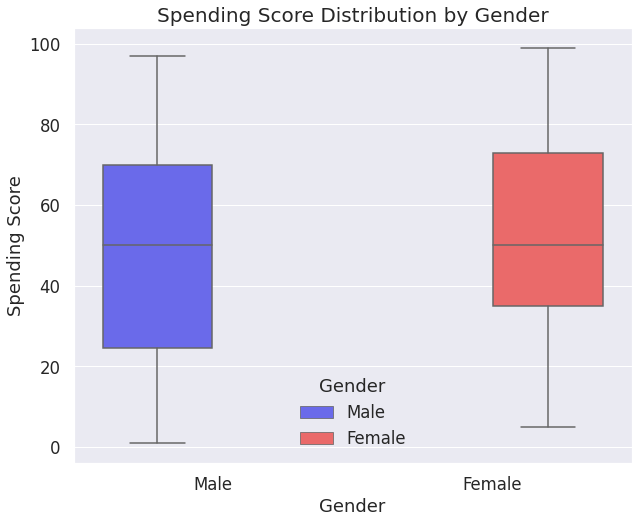

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

Visualizing Spending Score per Age by Gender on a scatterplot.

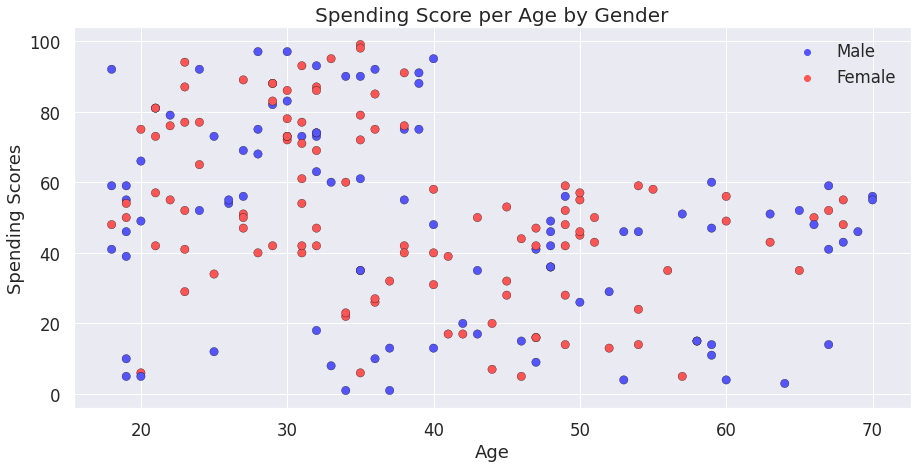

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Spending Score between Male and Female Customers using Violin Plot.

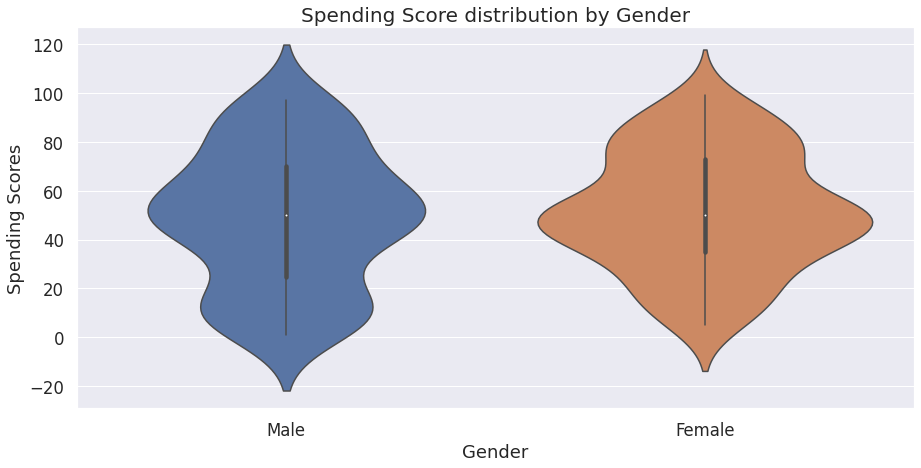

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

In [ ]:
data.isna().sum()




Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

#### K - Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

First we need to check the data for any missing values as it can ruin our model.

We conclude that we don't have any missing values therefore we can go forward and start the clustering procedure.

We will now view and select the data that we need for clustering.

In [ ]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now, we need to visualize the data which we are going to use for the clustering.
This will give us a fair idea about the data we're working on.

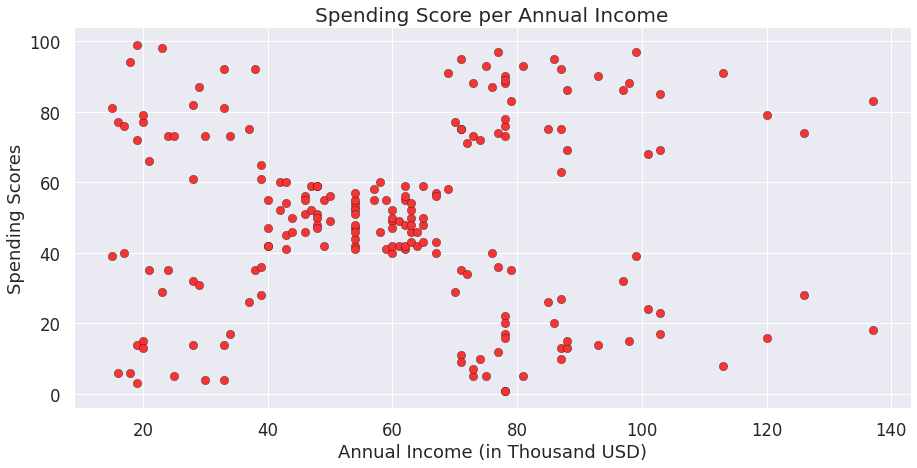

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

This gives us a fair Idea and patterns about some of the data. 

### 7. Determining No. of Clusters Required

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

![formula](images\formula.png)

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

With this simple line of code we get all the inertia value or the within the cluster sum of square.

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30259.65720729,  25036.41760403,
        21838.86369283,  19634.55462935,  17546.92800005,  15926.62703999,
        14694.36751618,  12816.89855587,  11762.28271384,  10853.92628424,
        10190.70383169,   9662.93657608,   8604.6002822 ,   8094.92059497,
         7588.69107608,   7304.40493118,   6787.64992785,   6454.3085545 ,
         6188.45132561,   5857.75224045,   5371.91114719,   5363.78044263,
         5074.93069515])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

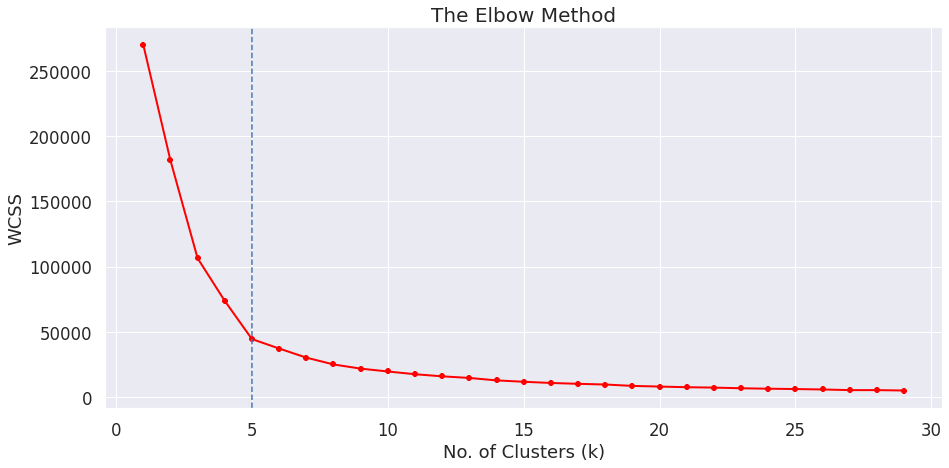

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

### 8. Clustering

Now we will build the model for creating clusters from the dataset.
We will use `n_clusters = 5` i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for  unsupervised learning therefore we will use `fit_predict()`
Suppose we were working with  supervised learning data set we would use `fit_tranform()`

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


We can also get the centroids of the clusters by the `cluster_centers_` attribute of KMeans algorithm.

In [ ]:
kms.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

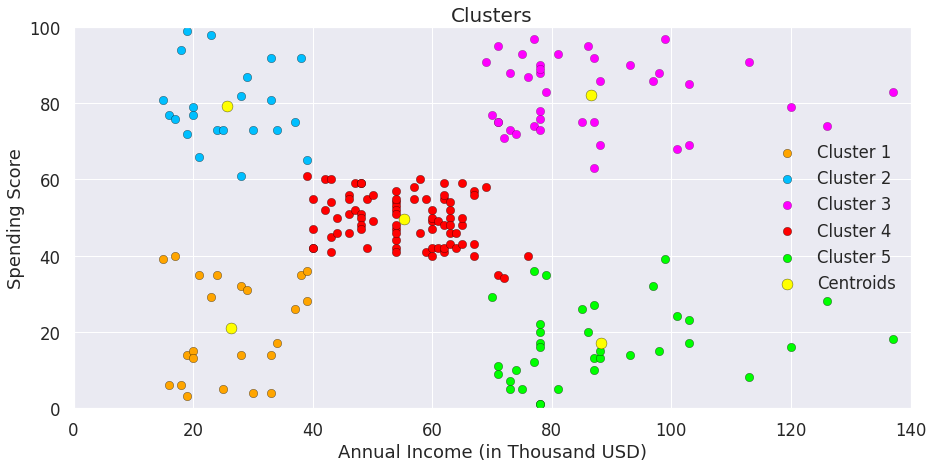

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

### 9. Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the 
data.
Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model, 
1. Cluster Orange
1. Cluster Blue
1. Cluster Purple
1. Cluster Red
1. Cluster Green

Visualizing all the clusters Seperately will provide us more insights.

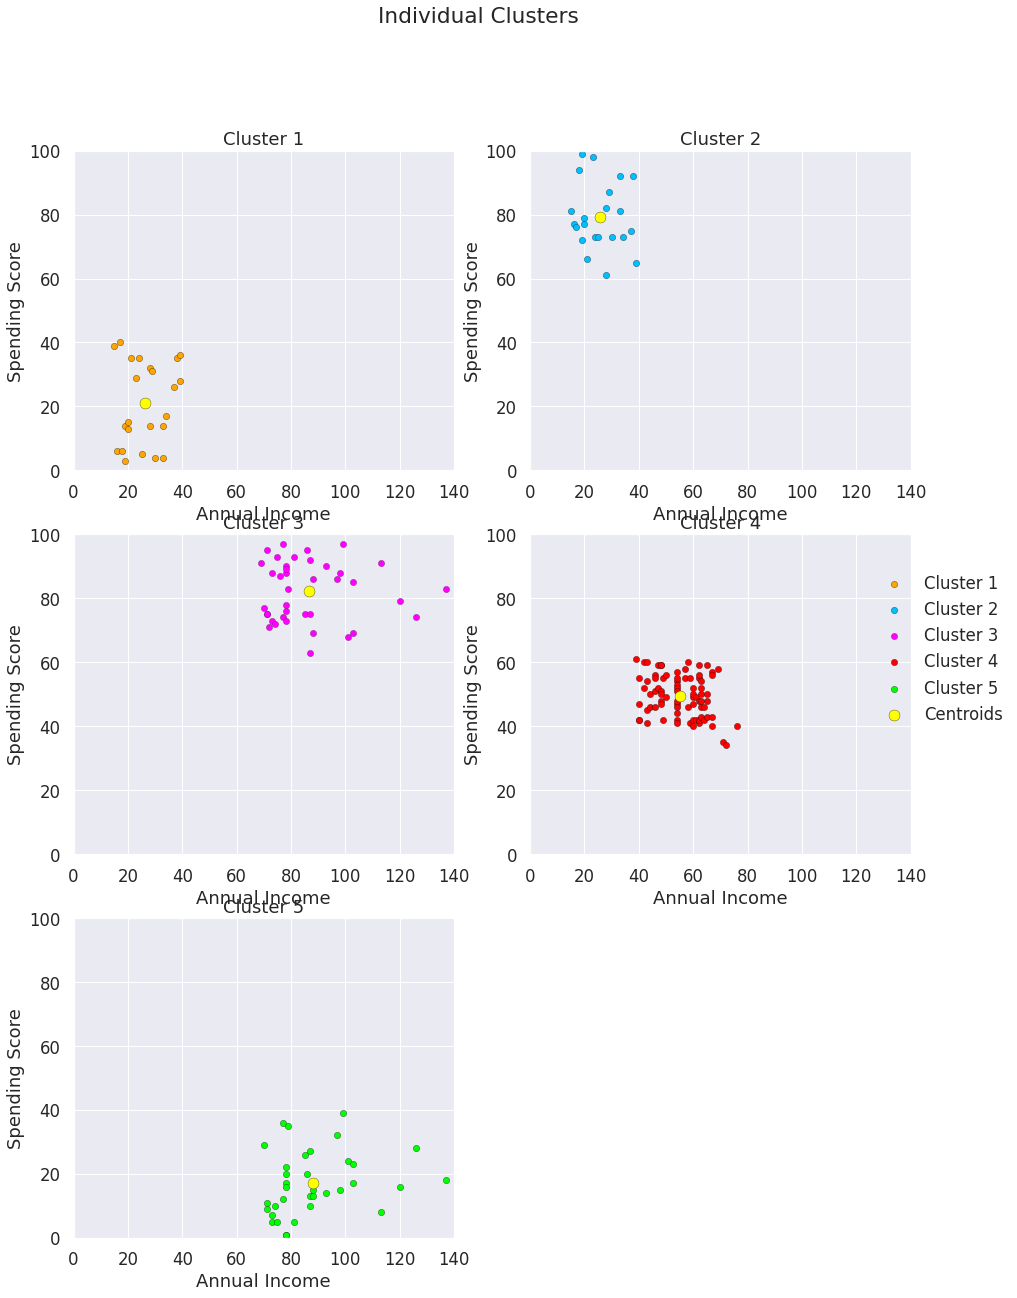

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

1. **Cluster Orange - Balanced Customers :**

    They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
<br>
1. **Cluster Blue - Pinch Penny Customers :**

    Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.
<br>
1. **Cluster Purple - Normal Customer :**

    Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
    <br>
1. **Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
    <br>
1. **Cluster Green - Target Customers :**

    Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.


Microsoft Machine Learning Studio Web Services Experience link:

https://services.azureml.net/workspaces/e1595778ce214e04ac1ae19ef830263d/webservices/0a99613436c84858b546db34d7e650d1/endpoints/default/test/rrs?fromStudio=true
